In [14]:
%load_ext autoreload
%autoreload 2

from consts import METRIC_NAMES, SORTER_NAMES, RANDOM_STATE
from models import build_bayesian_linear_regression_model
from train import get_prepared_agreement_score_dataset, train

import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
X_train, y_train, X_test, y_test = get_prepared_agreement_score_dataset()

In [16]:

model = build_bayesian_linear_regression_model(
    X_train, y_train, metric_names=METRIC_NAMES,
    sorter_names=list(SORTER_NAMES.keys()), hierarchical=True,
)

/home/mclancy/.local/share/.pyenv/versions/3.8.3/envs/truespikes/lib/python3.8/site-packages/pymc3/data.py:316: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])


weight __str__ = [[0.8201379  0.60529681 0.24231545 0.13370499 0.72618495 0.33954944
  0.24133761 0.95193292 0.6567837  0.03515912 0.216067   0.36414315
  0.42330455]
 [0.16202279 0.29275078 0.96159049 0.1086759  0.99182379 0.25931333
  0.88839567 0.48041581 0.64639438 0.29173382 0.39904261 0.64536145
  0.05669444]
 [0.83158062 0.82401675 0.89445353 0.29887745 0.56577936 0.17270682
  0.98260535 0.6281312  0.42350014 0.26838292 0.84973689 0.51663431
  0.71178223]
 [0.76798798 0.64188464 0.76932043 0.88193921 0.40949299 0.46467954
  0.02327996 0.07187445 0.23917199 0.35414882 0.95187907 0.76356798
  0.21435479]
 [0.45663034 0.0369335  0.43428806 0.19692335 0.67650287 0.26321491
  0.68986165 0.11520018 0.01610015 0.33469565 0.52444617 0.27667595
  0.35691383]
 [0.27575289 0.21263509 0.6047347  0.35760466 0.55921541 0.35733703
  0.73380703 0.39030101 0.51806054 0.80390546 0.89588656 0.08335289
  0.64186172]
 [0.31139871 0.17725903 0.97195921 0.80783737 0.69360368 0.37956702
  0.57067576 0.

/home/mclancy/.local/share/.pyenv/versions/3.8.3/envs/truespikes/lib/python3.8/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars


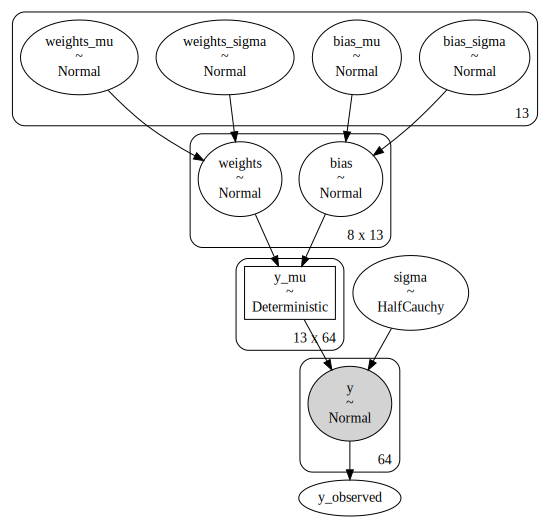

In [17]:
pm.model_to_graphviz(model)

In [18]:
with model:
        approx = pm.fit(100000, callbacks=[pm.callbacks.CheckParametersConvergence(tolerance=1e-4)])

/home/mclancy/.local/share/.pyenv/versions/3.8.3/envs/truespikes/lib/python3.8/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
Finished [100%]: Average Loss = 5,070.7


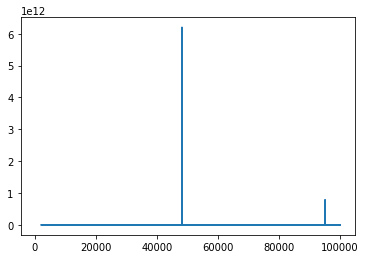

In [19]:
plt.plot(approx.hist)

In [20]:
with model:
    step = pm.NUTS(scaling=approx.cov.eval(), is_cov=True)
    trace = pm.sample(2000, step=step, init='adapt_diag', start=approx.sample()[0], progressbar=False)

/home/mclancy/.local/share/.pyenv/versions/3.8.3/envs/truespikes/lib/python3.8/site-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/tmp/ipykernel_116208/2347353989.py:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, step=step, init='adapt_diag', start=approx.sample()[0], progressbar=False)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bias, weights, bias_sigma